In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [39]:
path = "/Users/markusbonse/Desktop/Paper_Results_for_Plots/"

In [247]:
tmp_pickle_file = path + "Beta_Pic_2013/SNR_values.pkl"
Beta_pic_2013_results = pickle.load( open( tmp_pickle_file, "rb" ) )
Beta_pic_2013_range = slice(0, 100, 1)

tmp_pickle_file = path + "HR8799/SNR_values.pkl"
HR8799_results = pickle.load( open( tmp_pickle_file, "rb" ) )
HR8799_range = slice(0, 50, 1)

tmp_pickle_file = path + "Beta_Pic_29/SNR_values.pkl"
Beta_pic_29_results = pickle.load( open( tmp_pickle_file, "rb" ) )
Beta_pic_29_slice = slice(0, 100, 1)

tmp_pickle_file = path + "Beta_Pic_26/SNR_values.pkl"
Beta_pic_26_results = pickle.load( open( tmp_pickle_file, "rb" ) )
Beta_pic_26_slice = slice(0, 100, 1)

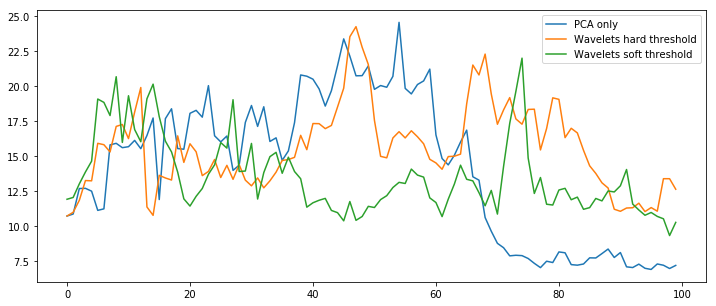

In [248]:
plt.figure(figsize=(12, 5))

#plt.plot(results["mean_no_wv_stacked.fits"][0:80])
plt.plot(Beta_pic_26_results["mean_no_wv.fits"][0:100], label="PCA only")
plt.plot(Beta_pic_26_results["mean_hard_wv.fits"][0:100], label="Wavelets hard threshold")
plt.plot(Beta_pic_26_results["mean_soft_wv.fits"][0:100], label="Wavelets soft threshold")
plt.legend()

## Make 2 x 2 subplot

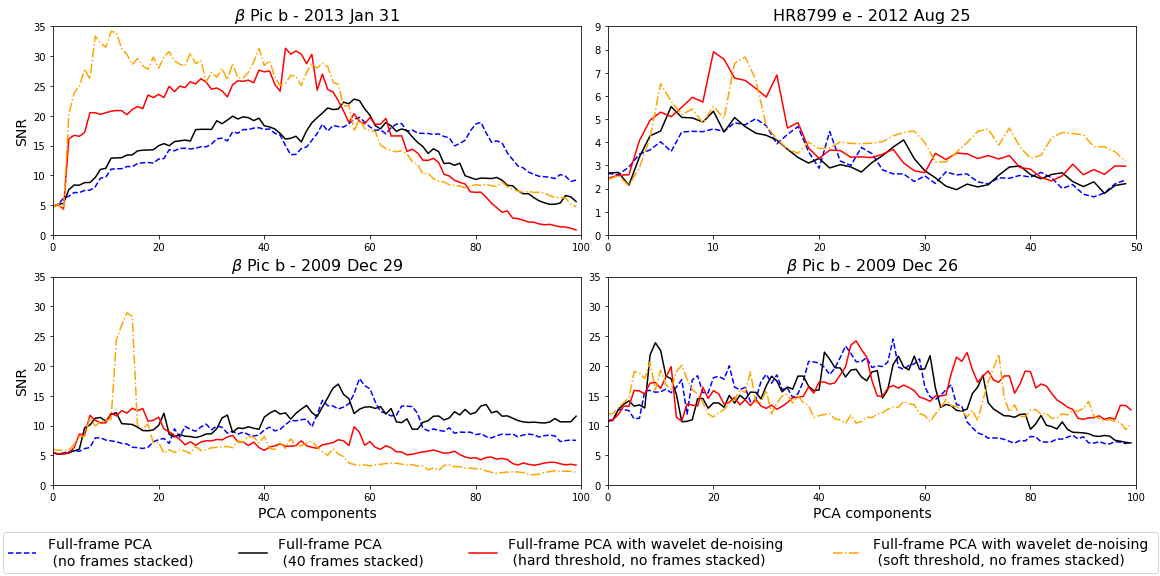

In [267]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

results_tuples = [(ax[0, 0], Beta_pic_2013_results, Beta_pic_2013_range, r'$\beta$ Pic b - 2013 Jan 31'), 
                  (ax[0, 1], HR8799_results, HR8799_range, "HR8799 e - 2012 Aug 25"),
                  (ax[1, 1], Beta_pic_26_results, Beta_pic_26_slice, r'$\beta$ Pic b - 2009 Dec 26'),
                  (ax[1, 0], Beta_pic_29_results, Beta_pic_29_slice, r'$\beta$ Pic b - 2009 Dec 29')]

for tmp_result in results_tuples:
    tmp_result[0].plot(tmp_result[1]["mean_no_wv.fits"][tmp_result[2]], 
                       label="Full-frame PCA \n (no frames stacked)",
                       ls="--",lw=1.5,
                       c="blue")
    tmp_result[0].plot(tmp_result[1]["mean_no_wv_stacked.fits"][tmp_result[2]], 
                       label="Full-frame PCA \n (40 frames stacked)",
                       ls='-',lw=1.5,
                       c="black")
    tmp_result[0].plot(tmp_result[1]["mean_hard_wv.fits"][tmp_result[2]], 
                       label="Full-frame PCA with wavelet de-noising \n (hard threshold, no frames stacked)",
                       ls="-",lw=1.5,
                       c="red")
    tmp_result[0].plot(tmp_result[1]["mean_soft_wv.fits"][tmp_result[2]], 
                       label="Full-frame PCA with wavelet de-noising \n (soft threshold, no frames stacked)",
                       ls='-.',lw=1.5,
                       c="orange")

    tmp_result[0].set_title(tmp_result[3], fontsize=16)
    tmp_result[0].set_xlim(xmin=tmp_result[2].start, xmax=tmp_result[2].stop)

results_tuples[0][0].set_ylim(0, 35)
results_tuples[1][0].set_ylim(0, 9)
results_tuples[2][0].set_ylim(0, 35)
results_tuples[3][0].set_ylim(0, 35)

results_tuples[0][0].set_ylabel("SNR", fontsize=14)
results_tuples[3][0].set_ylabel("SNR", fontsize=14)
results_tuples[2][0].set_xlabel("PCA components", fontsize=14)
results_tuples[3][0].set_xlabel("PCA components", fontsize=14)

fig.tight_layout()  
fig.subplots_adjust(wspace=0.05, hspace=0.2, bottom=0.15)
fig.legend(fontsize=14, borderaxespad=0.2, loc="lower center",
           ncol=4, mode="expand")

In [268]:
fig.savefig("/Users/markusbonse/Desktop/SNR_results.pdf")